## Logistic Regression
Don’t get confused by its name! It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

> Logistic Regression doesn't have straight fit line, its fit line looks like S curve. <br>
<img src="https://miro.medium.com/max/640/0*gKOV65tvGfY8SMem.png" width="500" height="500">

Since the logistic regression doesn't have cocept of residuals (error value of each point) because of its `S Curve`, s0 it is not able to use least square to find the best fit line. So Logistic regression uses concept of `maximum likelyhood` to find best fit curves. It first find the likelyhood of each points in of first curve and multiply it, then it tries new curve and then calculate and multiplies the likelyhood of each points and finally the curve with highest likelyhood is selected.

> 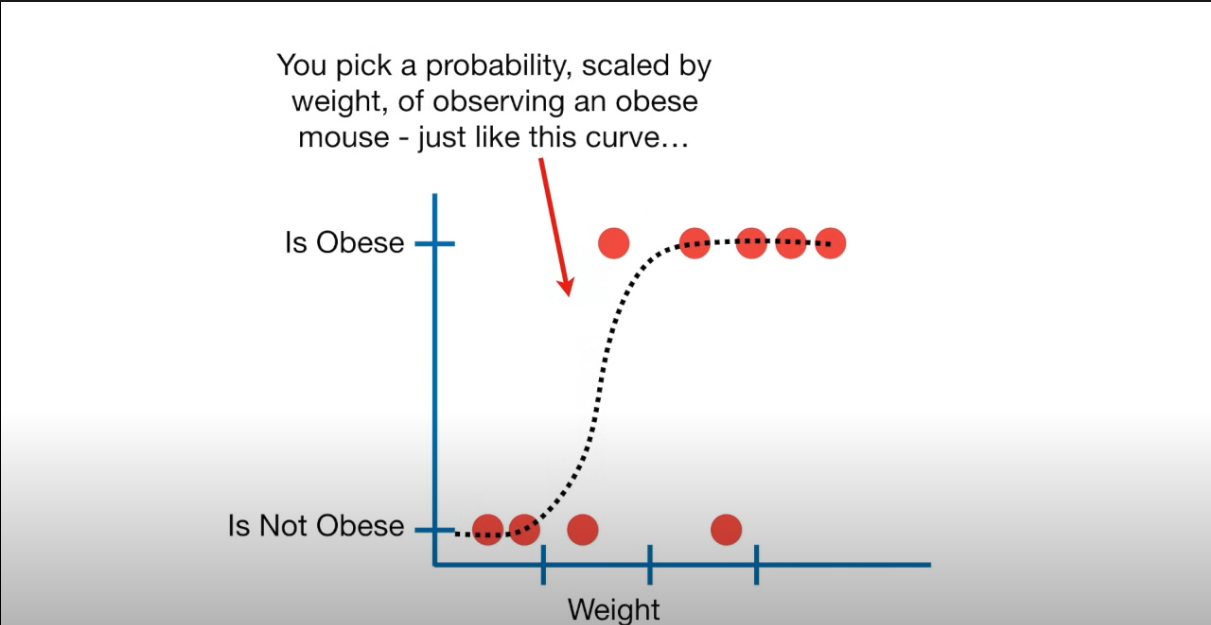
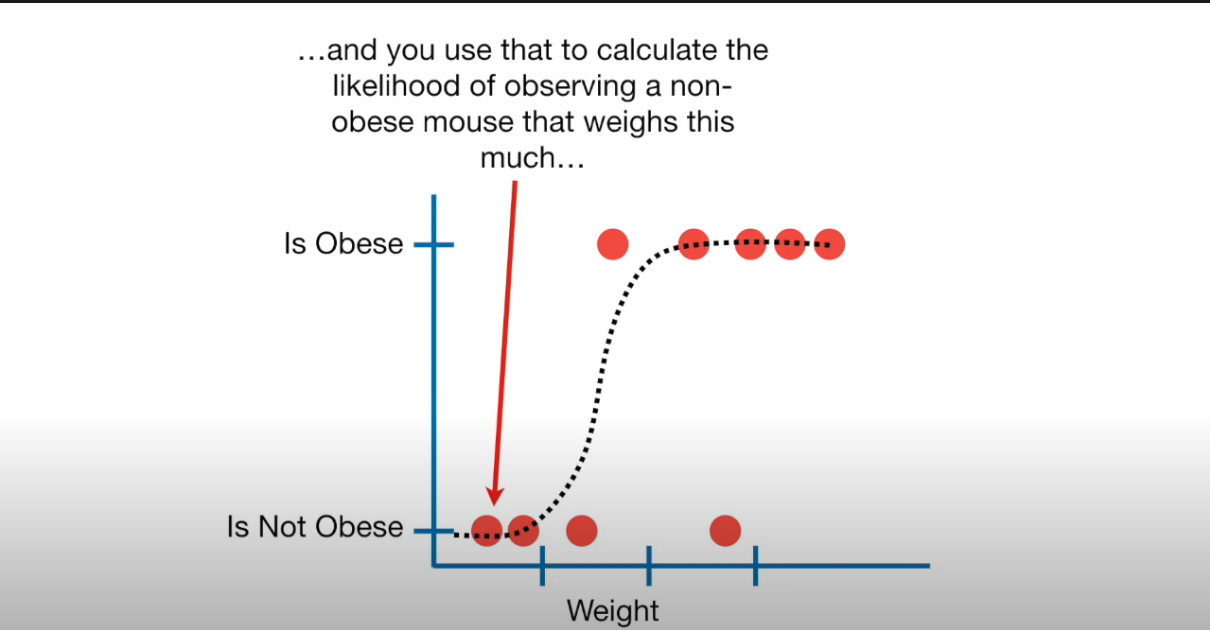
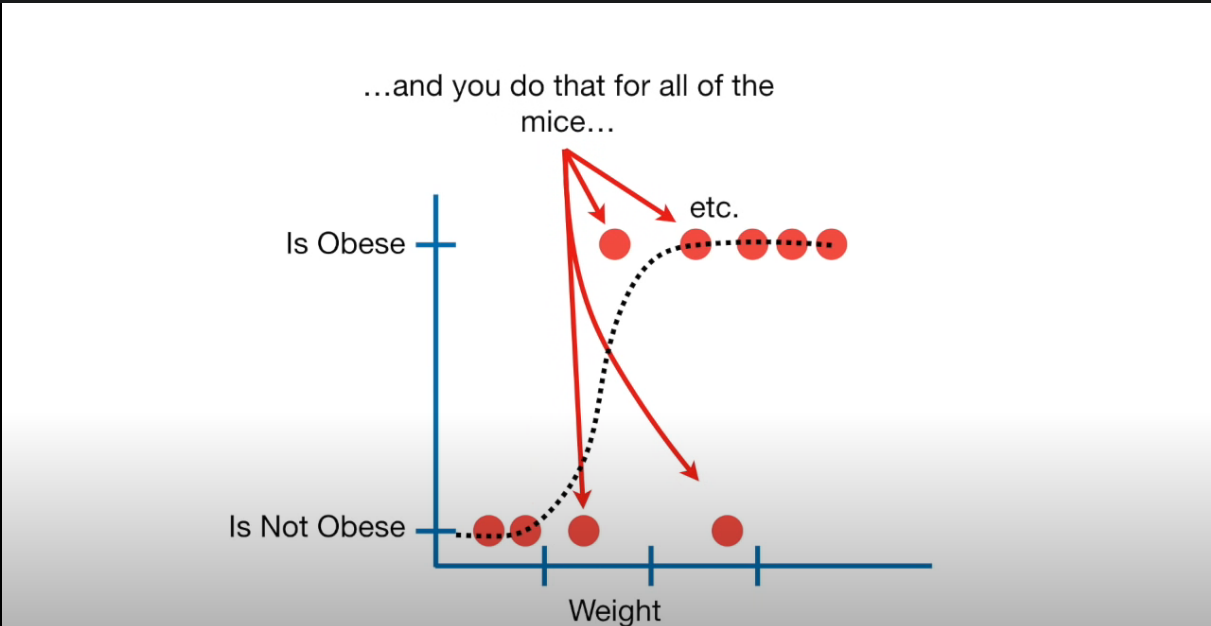
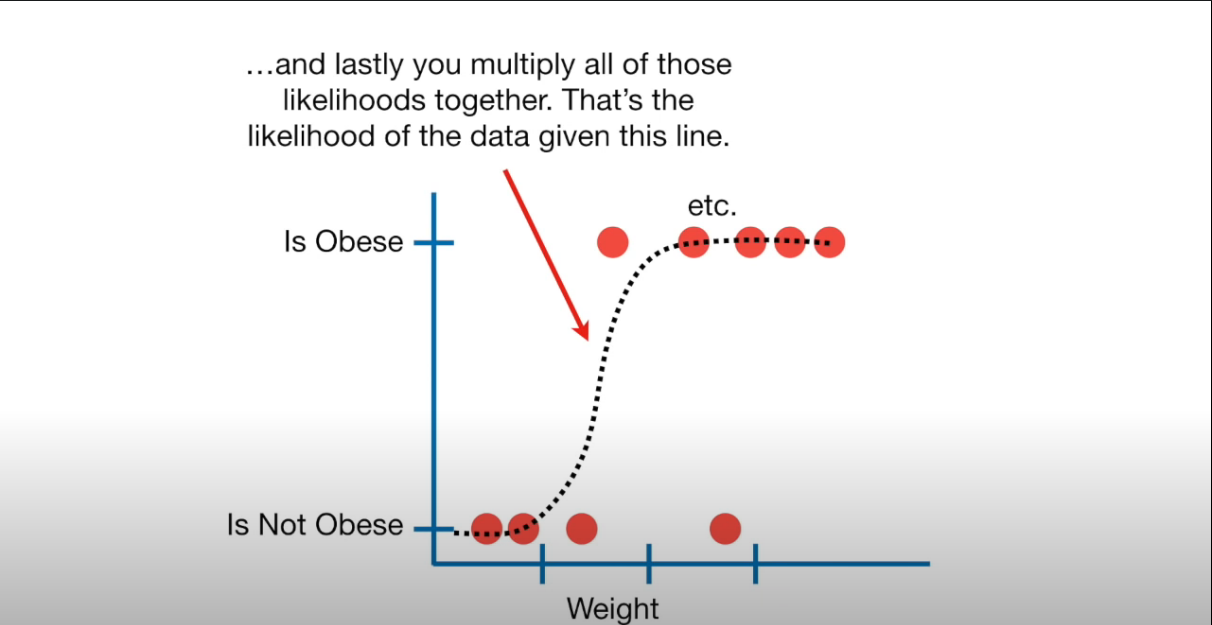
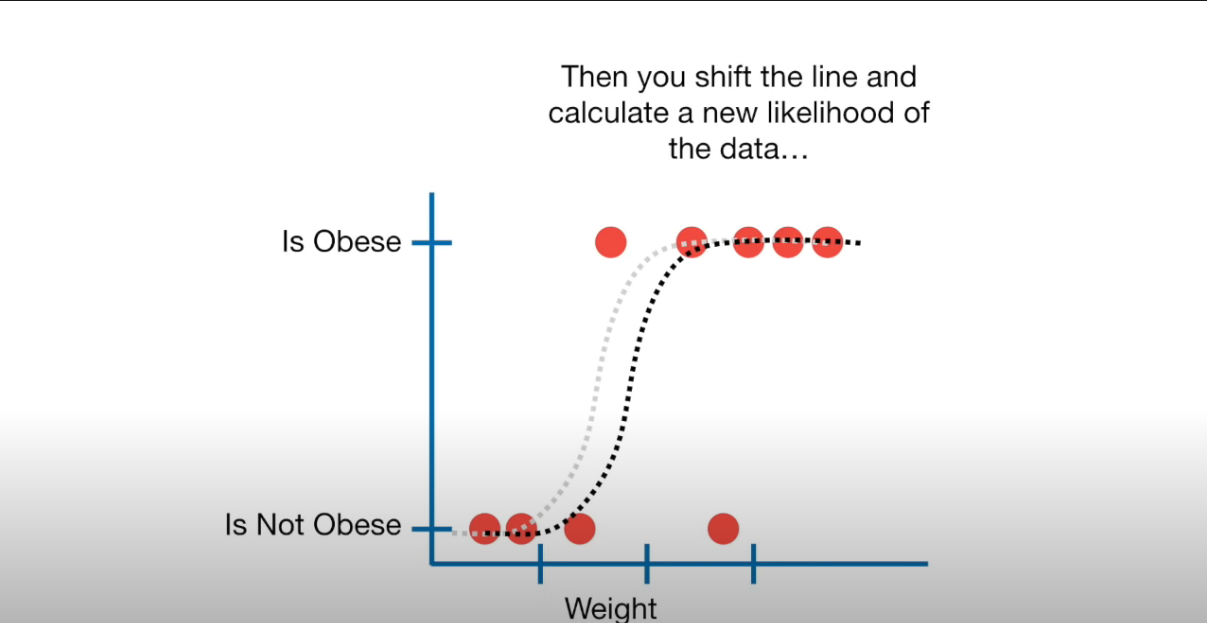
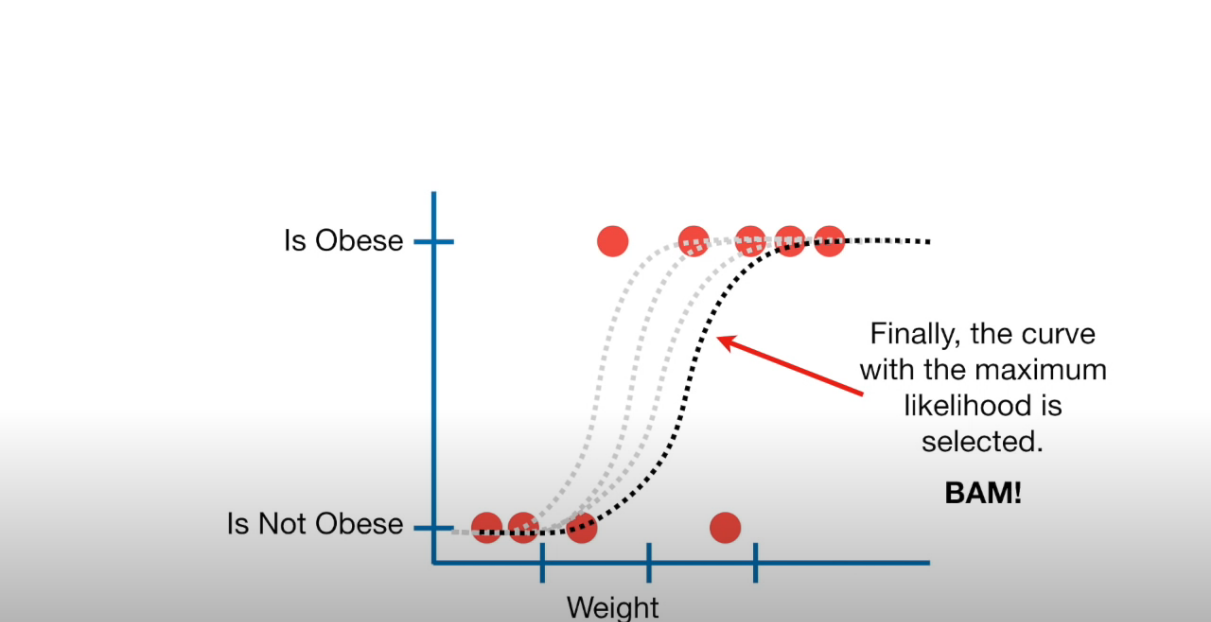

### Building Logistic Regression Model

In [1]:
# importing requirements
import pandas as pd # <---- for handling tabular data
from sklearn.linear_model import LogisticRegression # <--- for building logistic regression model
from sklearn.model_selection import train_test_split # <----- for splitting data
from sklearn.metrics import accuracy_score # <----- for calculating error

In [23]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5, random_state=49)

,User ID,Gender,Age,EstimatedSalary,Purchased
117,15591433,Male,36,52000,0
302,15720745,Female,37,137000,1
232,15813113,Male,40,107000,1
149,15767871,Male,20,74000,0
202,15735549,Female,39,134000,1


In [25]:
# we will label encode the "Gender" column into 0 --> Female and 1 --> Male
df['Gender'] = df['Gender'].apply(lambda x: (0, 1)[x=='Male'])
df['Gender'] = df['Gender'].astype('int64')  # converting data types of column

In [27]:
# User ID is not important for us so we will drop it
df = df.drop(['User ID'], axis=1)

In [28]:
df.sample(5, random_state=49)

,Gender,Age,EstimatedSalary,Purchased
117,1,36,52000,0
302,0,37,137000,1
232,1,40,107000,1
149,1,20,74000,0
202,0,39,134000,1


No we have 3 columns with which we are trying to predict that user will purchase or not so "Purchased" is our label and rest are features

In [30]:
# separate features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape)
print(label.shape)

(400, 3)
(400,)


In [58]:
# now we will split the data into train and test for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=21)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 3) (80, 3) (320,) (80,)


In [46]:
# now let's build our model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [47]:
# let's make prediction
y_pred = model.predict(x_test)

In [64]:
# now we will test the accuracy of the model
accuracy_score(y_test, y_pred)

0.7

70% accuracy is not bad, let's see other matrices

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
confusion_matrix(y_test, y_pred)

array([[46,  0],
       [34,  0]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        56
           1       0.00      0.00      0.00        24

    accuracy                           0.70        80
   macro avg       0.35      0.50      0.41        80
weighted avg       0.49      0.70      0.58        80



Its looks like logistic regression is bit good for predicting who will not purchase but is good for predicting who will purchases. So we could try different models.

### Additional Part

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred2 = model1.predict(x_test)

In [61]:
accuracy_score(y_test, y_pred2)

0.825

In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        56
           1       0.68      0.79      0.73        24

    accuracy                           0.82        80
   macro avg       0.79      0.82      0.80        80
weighted avg       0.84      0.82      0.83        80



In [63]:
confusion_matrix(y_test, y_pred2)

array([[47,  9],
       [ 5, 19]], dtype=int64)